# Diabetes

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.datasets import load_diabetes
sns.set_style('darkgrid')
%matplotlib inline

In [4]:
diabetes = load_diabetes()
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [5]:
diabetes['DESCR']

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, total serum cholesterol\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, total cholesterol / HDL\n      - s5      ltg, possibly log of serum triglycerides level\n      - s6      glu, blood sugar

In [6]:
df = pd.DataFrame(diabetes['data'], columns=diabetes['feature_names'])
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [20]:
df_target = pd.DataFrame(diabetes['target'], columns=['target'])
df_target.head(3)

,target
0,151.0
1,75.0
2,141.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,442.0,-2.511817e-19,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.230790e-17,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.245564e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.797570e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,442.0,-1.381499e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,3.918434e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-5.777179e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,-9.042540e-18,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,9.293722e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
s6,442.0,1.130318e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


<AxesSubplot: >

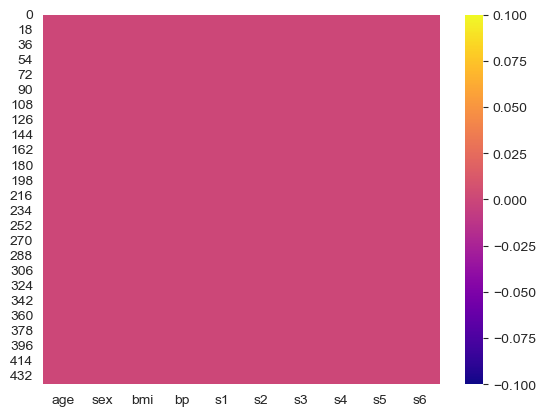

In [9]:
sns.heatmap(df.isnull(), cmap='plasma')

In [94]:
# ? sum() ?
df.select_dtypes(include='object').columns

Index([], dtype='object')

<AxesSubplot: >

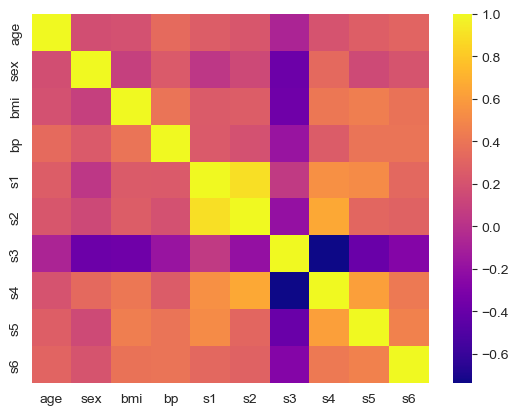

In [93]:
sns.heatmap(df.corr(), cmap='plasma')

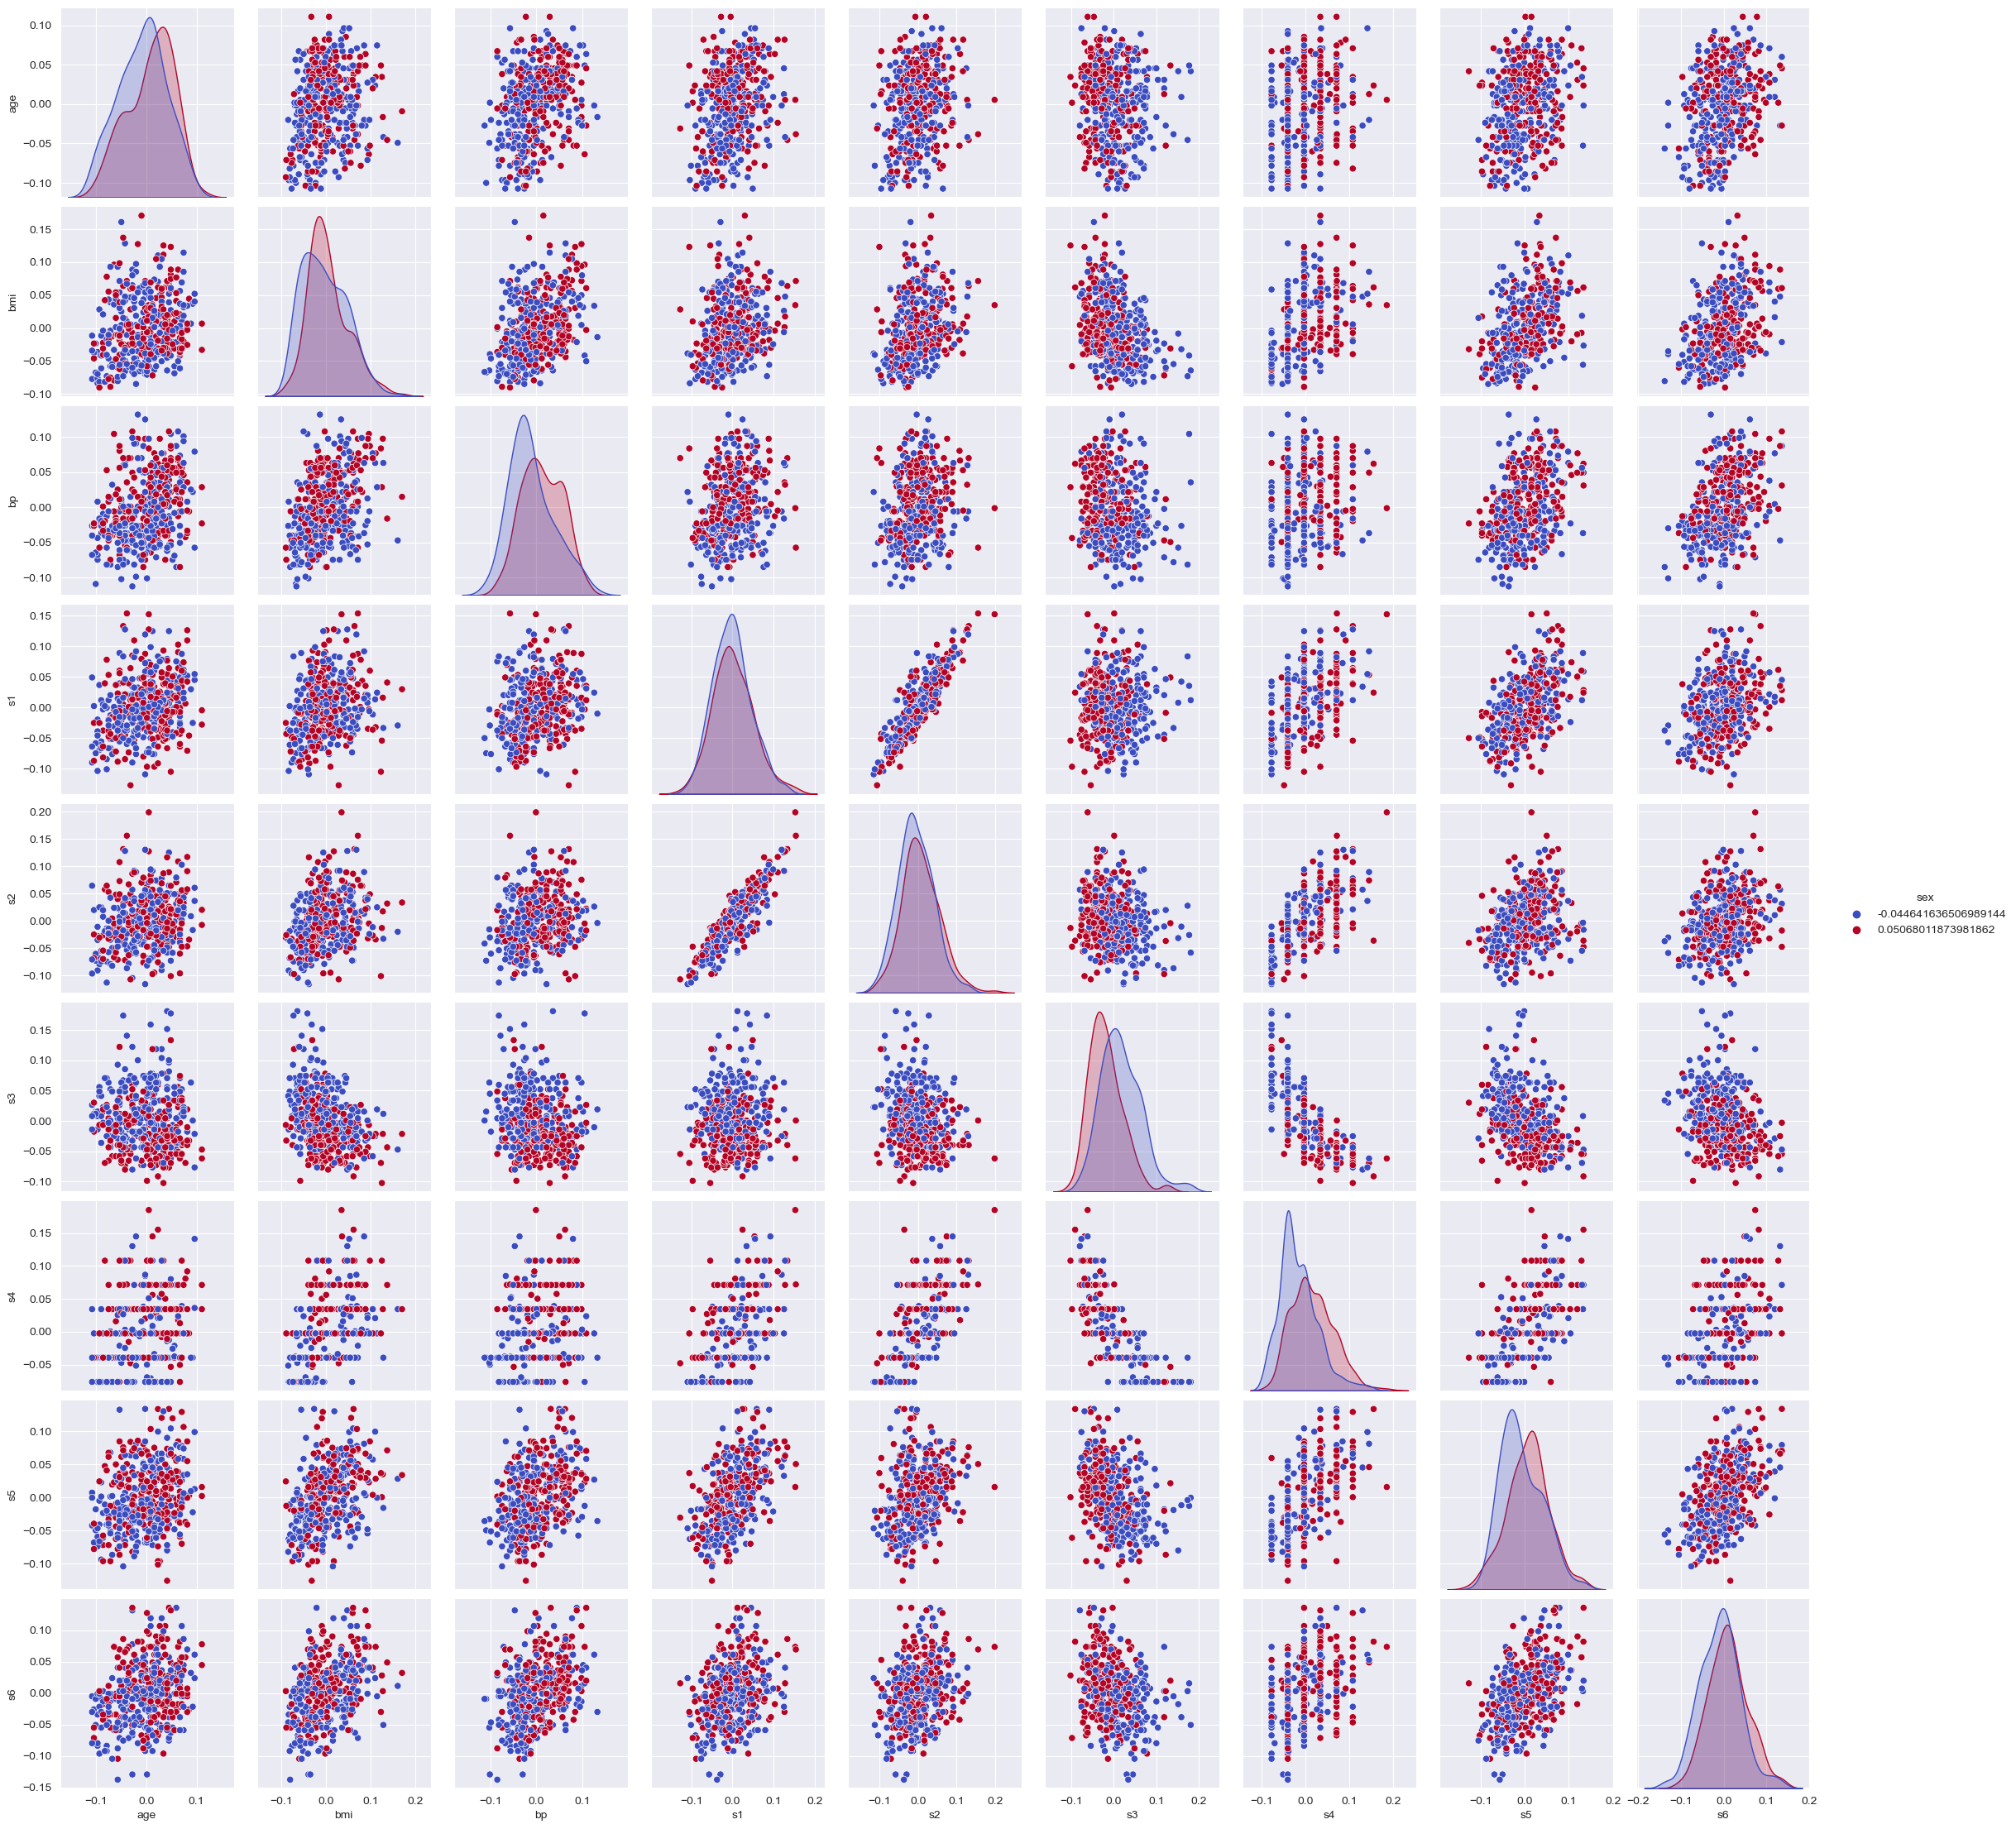

In [16]:
sns.pairplot(df, hue='sex', palette='coolwarm')

In [21]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df.values, df_target.values, test_size=.3)

In [96]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.losses import MSE
from tensorflow.keras.metrics import RootMeanSquaredError

In [95]:
model = Sequential()
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(rate=.5))
model.add(Dense(units=16, activation='relu'))
model.add(Dropout(rate=.5))
model.add(Dense(units=8, activation='relu'))
model.add(Dropout(rate=.5))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss=MSE, optimizer='adam')

In [103]:
log_dir = 'fit\log'
board = TensorBoard(log_dir, histogram_freq=1, write_graph=True, write_images=True, 
                    update_freq='epoch', profile_batch=2, embeddings_freq=1)

In [104]:
early_callback = EarlyStopping(monitor='val_loss', patience=25, mode='min', verbose=1)

In [105]:
epochs = 600
model.fit(X_train, y_train, validation_data=(X_test, y_test), 
          epochs=epochs, batch_size=64, verbose=1, callbacks=[early_callback, board])

Epoch 1/600
5/5 [==============================] - 1s 300ms/step - loss: 28799.0059 - val_loss: 28711.4883
Epoch 2/600
5/5 [==============================] - 0s 46ms/step - loss: 28801.0547 - val_loss: 28711.4883
Epoch 3/600
5/5 [==============================] - 0s 45ms/step - loss: 28800.8164 - val_loss: 28711.4883
Epoch 4/600
5/5 [==============================] - 0s 39ms/step - loss: 28799.9316 - val_loss: 28711.4883
Epoch 5/600
5/5 [==============================] - 0s 44ms/step - loss: 28799.9414 - val_loss: 28711.4883
Epoch 6/600
5/5 [==============================] - 0s 46ms/step - loss: 28801.6895 - val_loss: 28711.4883
Epoch 7/600
5/5 [==============================] - 0s 46ms/step - loss: 28800.7891 - val_loss: 28711.4883
Epoch 8/600
5/5 [==============================] - 0s 52ms/step - loss: 28801.4863 - val_loss: 28711.4883
Epoch 9/600
5/5 [==============================] - 0s 50ms/step - loss: 28798.9746 - val_loss: 28711.4883
Epoch 10/600
5/5 [===========================

In [106]:
history = pd.DataFrame(model.history.history)
history.head()

,loss,val_loss
0,28799.005859,28711.488281
1,28801.054688,28711.488281
2,28800.816406,28711.488281
3,28799.931641,28711.488281
4,28799.941406,28711.488281


<AxesSubplot: >

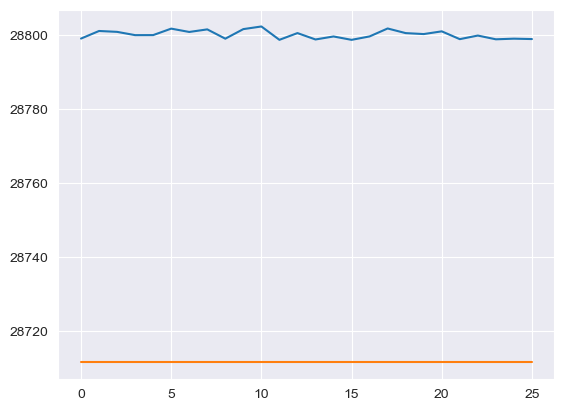

In [107]:
history['loss'].plot()
history['val_loss'].plot()

In [108]:
predictions = model.predict(X_test)

5/5 [==============================] - 0s 2ms/step


<AxesSubplot: ylabel='Count'>

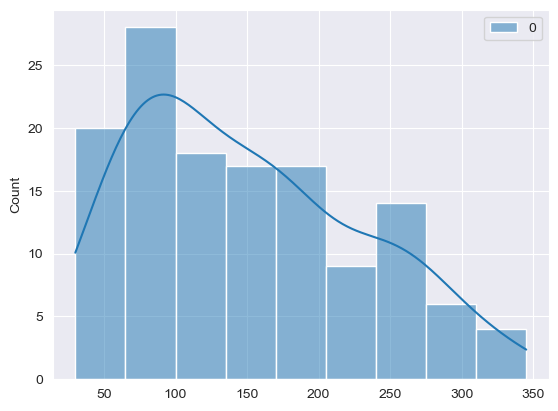

In [109]:
sns.histplot((y_test - predictions), kde=True)

In [111]:
print(log_dir)

fit\log


In [112]:
pwd

'D:\\MachineLearning\\Courses\\University - Data science'